In [23]:
import pandas as pd
import numpy as np
from src.utils import error
from src.OPFClassifier import OptimumPathForestClassifier

from sklearn.manifold import MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#%matplotlib inline

In [2]:
df_name = 'ChlorineConcentration'
df = pd.read_table(f'data/UCRArchive_2018/{df_name}/{df_name}_TRAIN.tsv', header=None)
df_test = pd.read_table(f'data/UCRArchive_2018/{df_name}/{df_name}_TEST.tsv', header=None)

X, Y = df.iloc[:, 1:], df.iloc[:, 0]
X_test, Y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

In [3]:
opf = OptimumPathForestClassifier('euclidean-distance')
opf.fit(X, Y)
preds = opf.classify(X_test)

In [4]:
embedding = MDS(n_components=2)
X_t = embedding.fit_transform(X)
X.shape, X_t.shape

((467, 166), (467, 2))

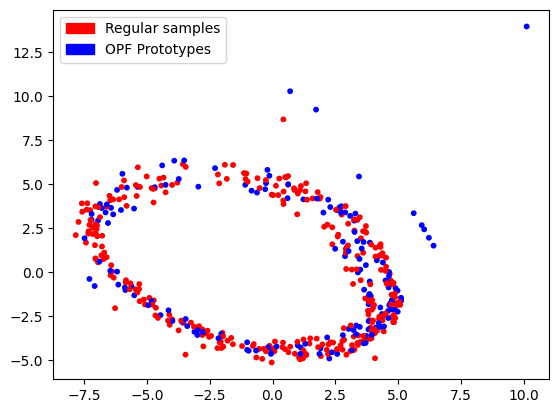

In [5]:
colors = np.array(["blue"] * X_t.shape[0])
colors[opf.prototypes] = "red"
plt.scatter(X_t[:,0], X_t[:,1], color=colors, s=10)
plt.legend(handles=[
    mpatches.Patch(color='red', label='Regular samples'),
    mpatches.Patch(color='blue', label='OPF Prototypes')
])
plt.show()

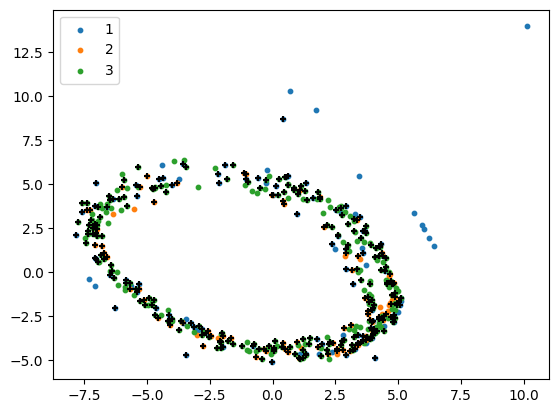

In [6]:
plt.scatter(X_t[Y==1,0], X_t[Y==1,1], s=10)
plt.scatter(X_t[Y==2,0], X_t[Y==2,1], s=10)
plt.scatter(X_t[Y==3,0], X_t[Y==3,1], s=10)
plt.scatter(X_t[opf.prototypes,0], X_t[opf.prototypes,1], s=13, c='black', marker='+')
plt.legend(["1", "2", "3"])
plt.show()

In [7]:
prototypes = opf.original_prototypes
print("%d prototypes were chosen (%.2f%%)" % (len(prototypes), len(prototypes)/X.shape[0]*100))

306 prototypes were chosen (65.52%)


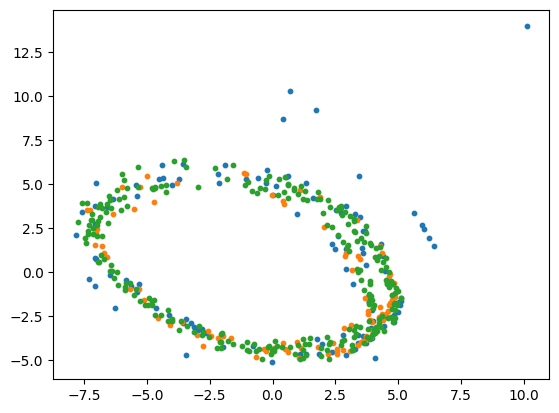

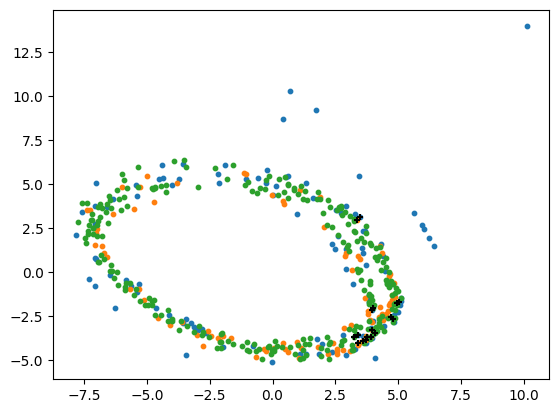

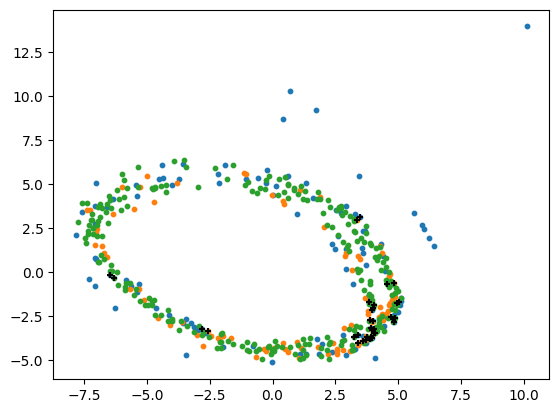

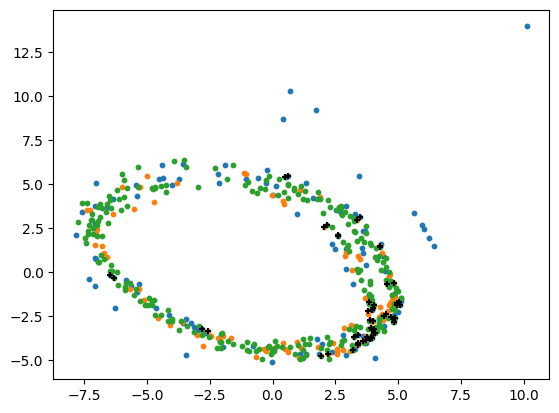

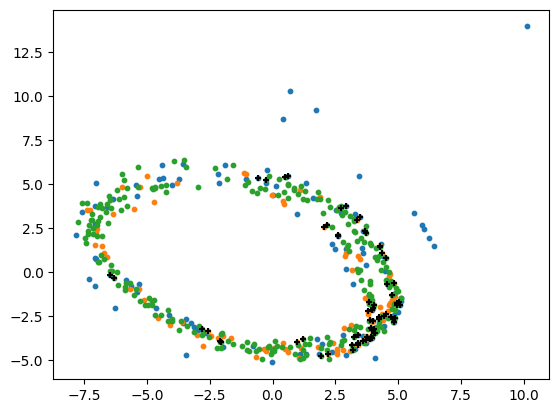

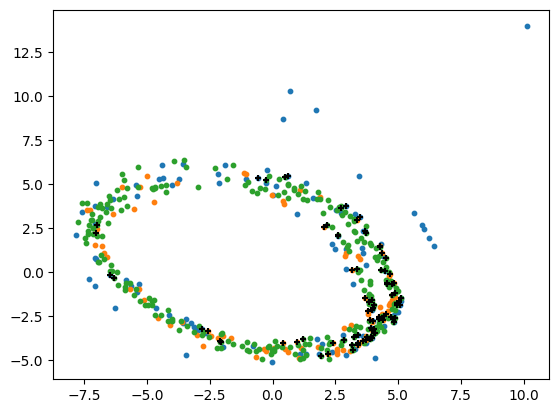

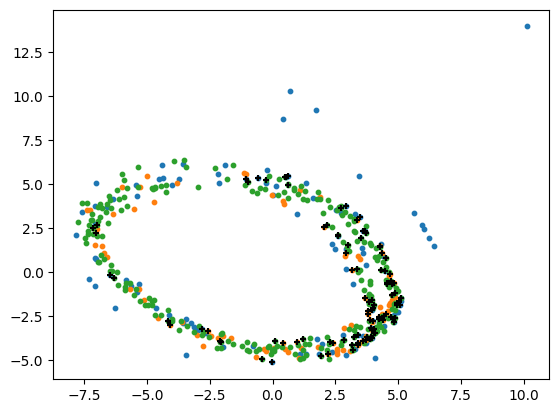

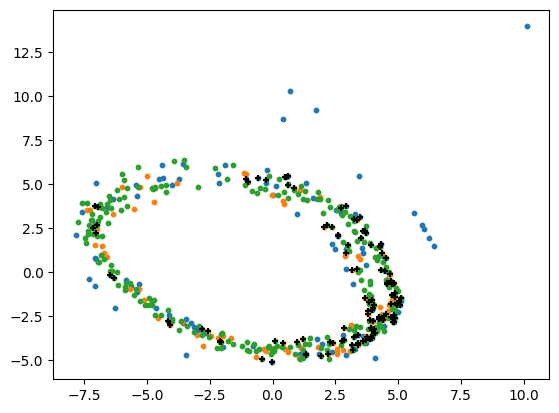

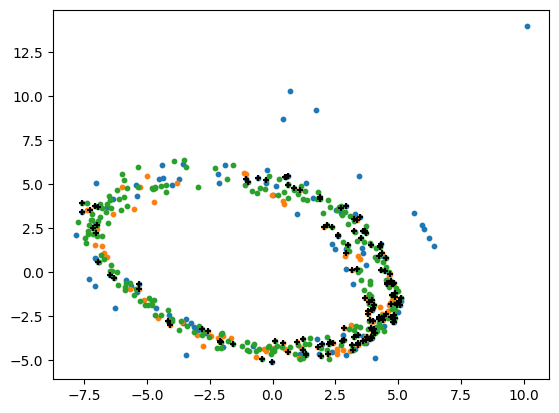

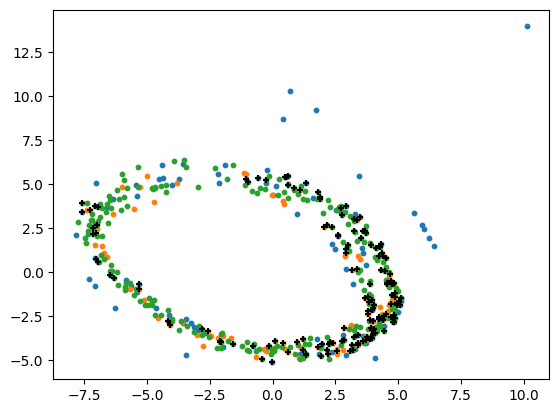

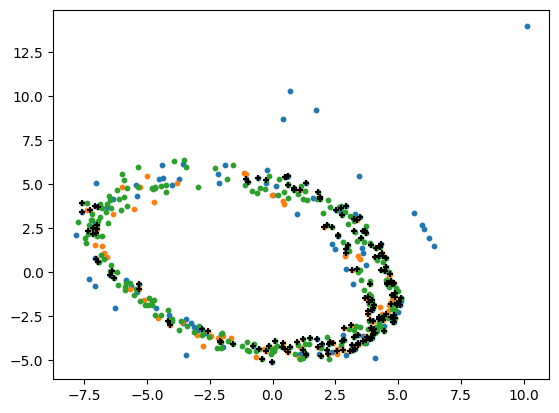

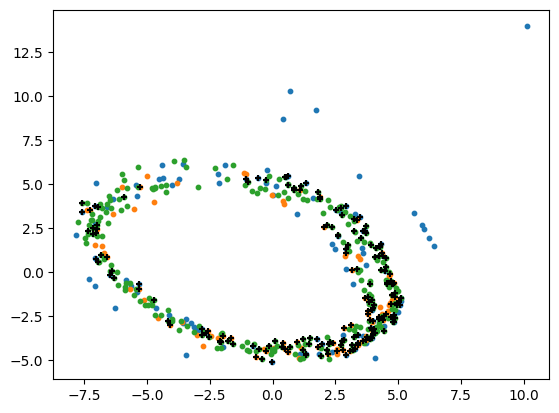

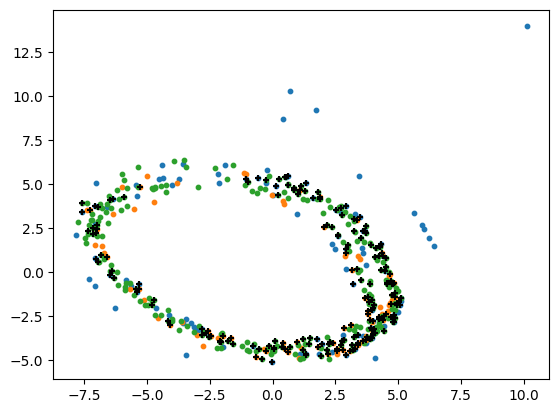

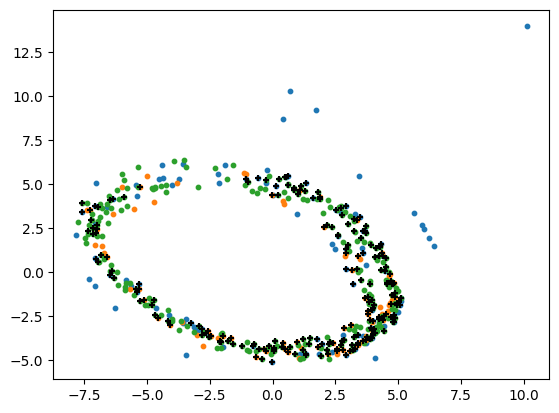

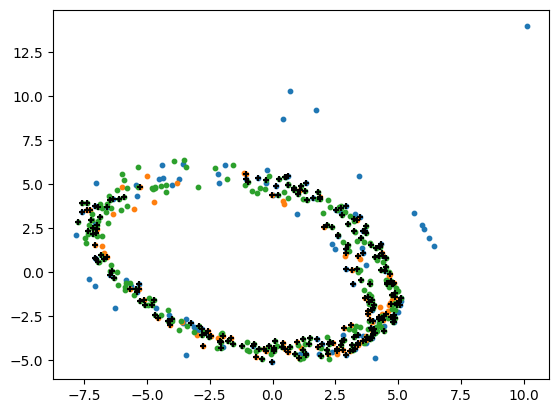

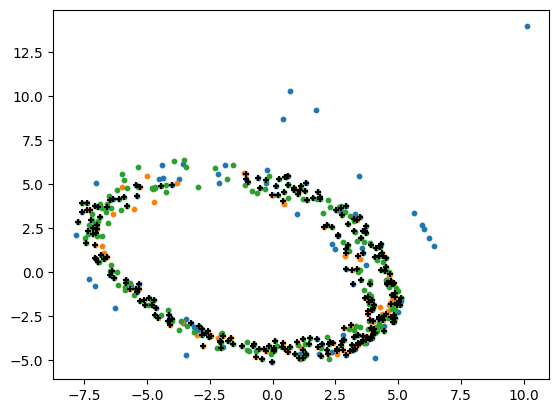

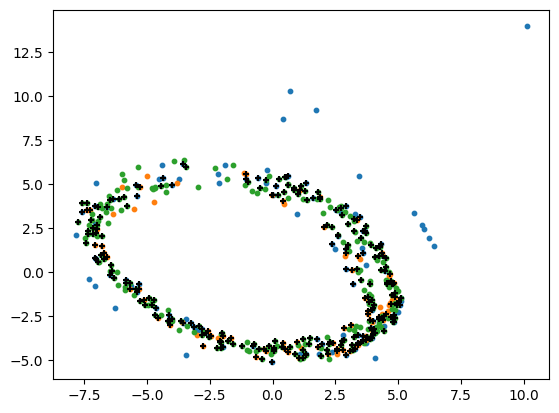

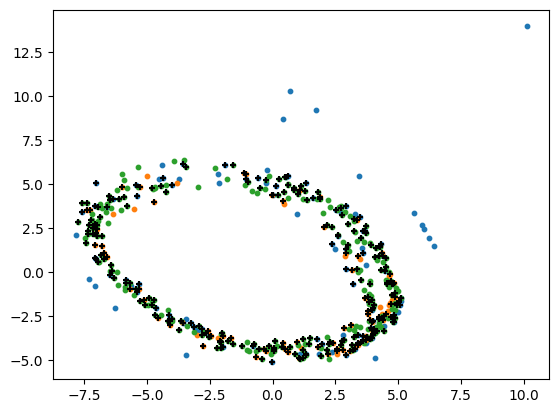

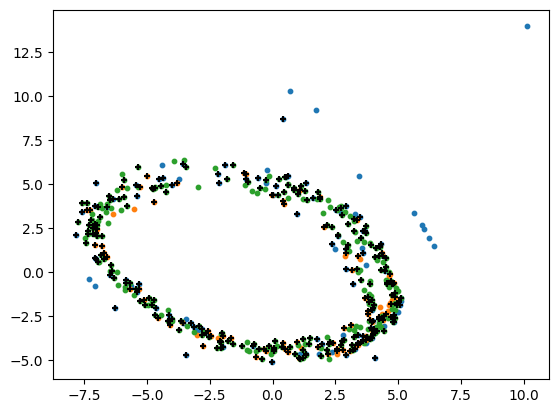

In [16]:
for i in range(0, len(prototypes)+1, 17):
    plt.scatter(X_t[Y==1,0], X_t[Y==1,1], s=10)
    plt.scatter(X_t[Y==2,0], X_t[Y==2,1], s=10)
    plt.scatter(X_t[Y==3,0], X_t[Y==3,1], s=10)
    plt.scatter(X_t[prototypes[:i],0],X_t[prototypes[:i],1], s=13, c='black', marker='+')
    plt.show()

fig size: 100.0 DPI, size in inches [6.4 4.8]


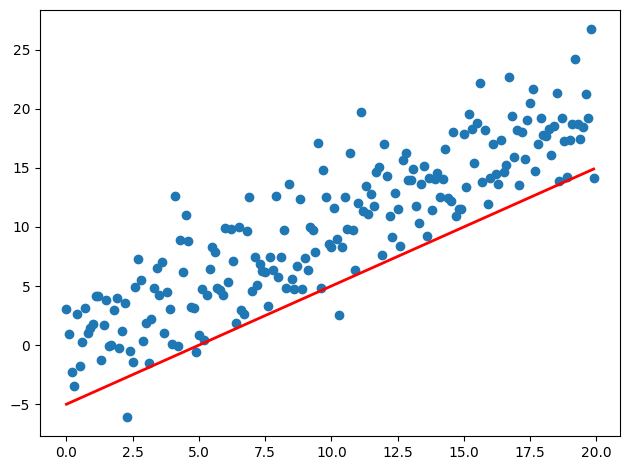

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()